<a href="https://colab.research.google.com/github/RanjithKishore/colab/blob/master/boston_pricing_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import tensorflow
%tensorflow_version 1.x
import keras
import numpy
import matplotlib.pyplot as plt

TensorFlow is already loaded. Please restart the runtime to change versions.


In [2]:
from keras.datasets import boston_housing as b

In [3]:
(train_data,train_targets),(test_data,test_targets)=b.load_data()

57344/57026 [==============================] - 0s 2us/step


In [4]:
train_data.shape

(404, 13)

In [5]:
train_targets[0]

15.2

In [6]:
mean=train_data.mean(axis=0)

In [7]:
mean

array([3.74511057e+00, 1.14801980e+01, 1.11044307e+01, 6.18811881e-02,
       5.57355941e-01, 6.26708168e+00, 6.90106436e+01, 3.74027079e+00,
       9.44059406e+00, 4.05898515e+02, 1.84759901e+01, 3.54783168e+02,
       1.27408168e+01])

In [8]:
train_data-=mean


In [10]:
std=train_data.std(axis=0)
train_data=train_data/std
test_data-=mean
test_data/=std

In [17]:
from keras import models,layers

model=models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(13,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='adam',loss='mse',metrics=['mae'])



In [41]:
history=model.fit(train_data[:380],train_targets[:380],epochs=50,batch_size=512,validation_data=(train_data[380:],train_targets[380:]))

Train on 380 samples, validate on 24 samples
Epoch 1/50
380/380 [==============================] - 0s 9us/step - loss: 0.9429 - mae: 0.7107 - val_loss: 4.3589 - val_mae: 1.6060
Epoch 2/50
380/380 [==============================] - 0s 19us/step - loss: 0.8649 - mae: 0.6574 - val_loss: 4.4552 - val_mae: 1.6238
Epoch 3/50
380/380 [==============================] - 0s 11us/step - loss: 0.7979 - mae: 0.6069 - val_loss: 4.6154 - val_mae: 1.6529
Epoch 4/50
380/380 [==============================] - 0s 10us/step - loss: 0.7758 - mae: 0.5816 - val_loss: 4.8156 - val_mae: 1.6924
Epoch 5/50
380/380 [==============================] - 0s 9us/step - loss: 0.7969 - mae: 0.5887 - val_loss: 5.0079 - val_mae: 1.7287
Epoch 6/50
380/380 [==============================] - 0s 10us/step - loss: 0.8332 - mae: 0.6097 - val_loss: 5.1419 - val_mae: 1.7540
Epoch 7/50
380/380 [==============================] - 0s 10us/step - loss: 0.8529 - mae: 0.6241 - val_loss: 5.1885 - val_mae: 1.7656
Epoch 8/50
380/380 [======

In [42]:
history_dict=history.history
history_dict.keys()
vl=history_dict['val_loss']
l=history_dict['loss']
m=history_dict['mae']
vm=history_dict['val_mae']

No handles with labels found to put in legend.


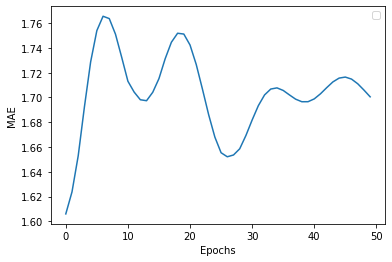

In [44]:
plt.plot(range(0,50),vm)
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [45]:
test,test=model.evaluate(test_data,test_targets)

102/102 [==============================] - 0s 38us/step
